<a href="https://colab.research.google.com/github/sindhura-nk/Artificial-Intelligence_2_1377/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression with Keras

## Change the Runtime type first
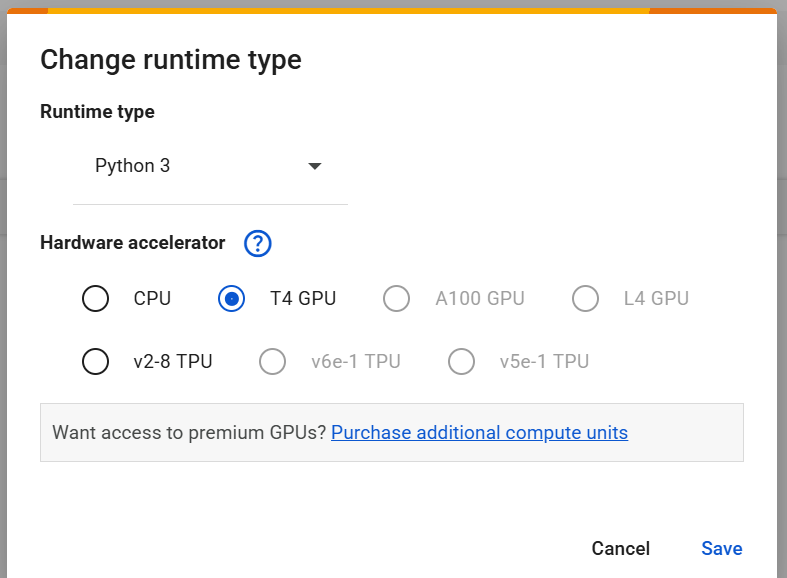

## Data Ingestion

In [1]:
import pandas as pd
path = "https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv"
df = pd.read_csv(path)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Target Feature: Power Energy Output : PE

## Perform the basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [3]:
## Check for duplicated rows
df.duplicated().sum()

np.int64(41)

In [4]:
df = df.drop_duplicates()

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
## Check for missing values
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


## Separate X and Y features

In [7]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [8]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Data Preprocessing and Data cleaning

In [10]:
from sklearn.pipeline import make_pipeline # pipelines allows us to perform multiple tasks on data
from sklearn.preprocessing import StandardScaler # this performs scaling of numerical data
from sklearn.impute import SimpleImputer # this handles data cleaning

In [11]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"),
                         StandardScaler()).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Perform Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.70,random_state=21)

In [14]:
xtrain.head()

,AT,V,AP,RH
6428,0.995670,0.890501,-0.184688,-0.643877
2512,-0.502179,-0.744418,0.438186,-0.913616
9349,-1.631947,-0.888676,0.187353,0.898561
4114,-0.009165,0.439598,0.848945,0.786968
5567,1.260313,1.718208,-0.962437,0.144115


In [15]:
xtest.head()

,AT,V,AP,RH
4903,0.340109,0.683180,1.061059,-0.367977
2944,0.023076,0.405701,-0.043279,1.225807
1771,-0.354409,-0.744418,0.192403,-0.730823
1450,-0.586811,-1.020320,-1.164450,0.631561
5399,-0.310078,-1.148812,-1.723353,-0.596639


In [16]:
ytrain.head()

,PE
6428,442.71
2512,467.41
9349,485.38
4114,449.74
5567,430.32


In [17]:
ytest.head()

,PE
4903,453.03
2944,446.15
1771,459.98
1450,466.27
5399,459.83


## Model Building with Keras

In [18]:
from keras.models import Sequential
from keras.layers import Input,Dense

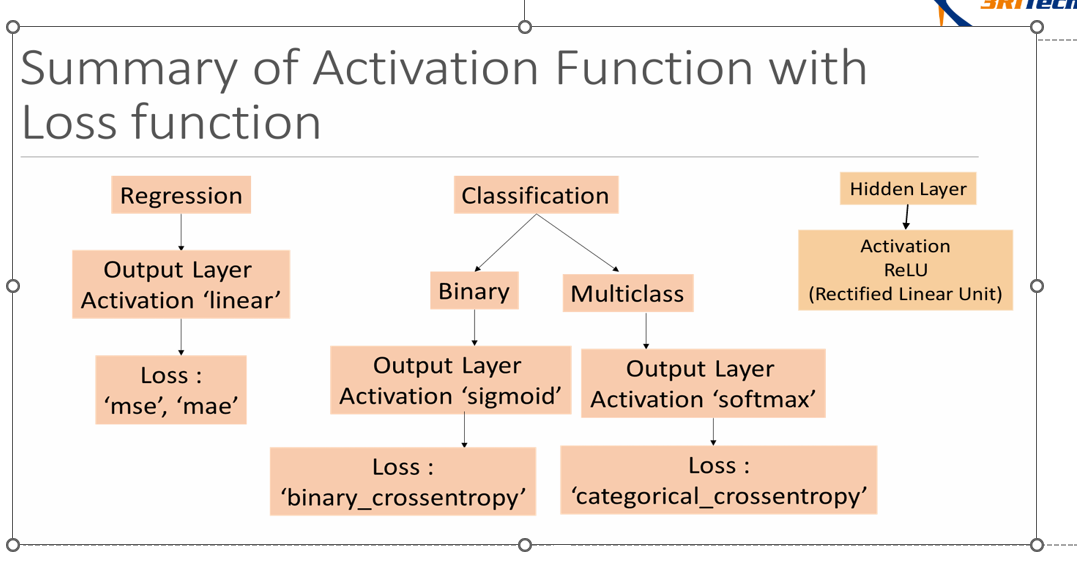

In [19]:
xtrain.shape

(6668, 4)

In [20]:
xtrain.shape[0]

6668

In [21]:
xtrain.shape[1]

4

In [22]:
# Intialize the model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the Hidden layer 1
model.add(Dense(units=8,activation="relu"))

# Add the Hidden Layer2
model.add(Dense(units=4,activation="relu"))

# Add the output layer
model.add(Dense(units=1,activation="linear"))


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

Machine Learning: Dataset is divided into training and testing . Model is trained only on training data

Deep Learning: Dataset is divided into training and testing. Model is trained after splitting training data further into training and validating.

In [25]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 206570.8281 - mae: 454.1804 - val_loss: 206472.6094 - val_mae: 454.0838
Epoch 2/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 205835.0156 - mae: 453.3905 - val_loss: 204046.4375 - val_mae: 451.4617
Epoch 3/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 202184.9844 - mae: 449.4233 - val_loss: 194354.3125 - val_mae: 440.7650
Epoch 4/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 189945.3750 - mae: 435.7083 - val_loss: 173702.0938 - val_mae: 416.3213
Epoch 5/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 167822.9062 - mae: 408.6223 - val_loss: 145578.5781 - val_mae: 377.6390
Epoch 6/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 139770.7031 - mae: 367.9152 - val_loss: 118234.9375 - val_mae: 329.5462
Epoch 7/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 114882.2812 - mae: 320.7916 - val_loss: 97854.3984 - val_mae: 281.5526
Epoch 8/100
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 94904.86

## Evaluate the model

In [26]:
model.evaluate(xtrain,ytrain)

209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 21.0385 - mae: 3.6149


[20.369108200073242, 3.5652389526367188]

In [27]:
model.evaluate(xtest,ytest)

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 19.9153 - mae: 3.4760


[20.72981834411621, 3.5411031246185303]

## Learning Curve

Text(0.5, 1.0, 'Learning Curve')

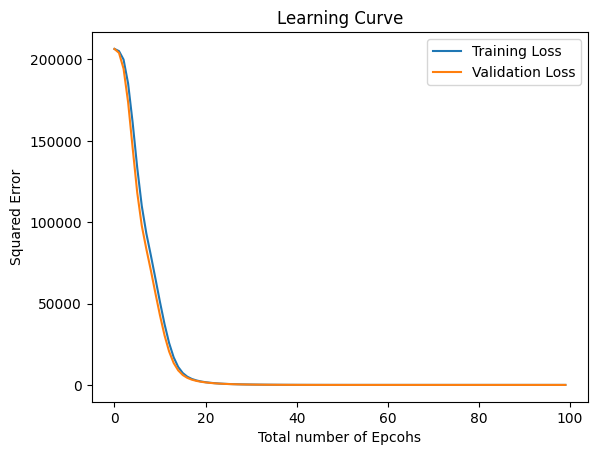

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.xlabel("Total number of Epcohs")
plt.legend()
plt.ylabel("Squared Error")
plt.title("Learning Curve")

## Above Learning curve states that model is learning properly. Will use this model for final predictions

In [29]:
ypred_test =model.predict(xtest)
ypred_test[:5]

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[448.34085],
       [449.54712],
       [463.39615],
       [465.40997],
       [462.50702]], dtype=float32)

In [30]:
ytest.head()

,PE
4903,453.03
2944,446.15
1771,459.98
1450,466.27
5399,459.83


In [33]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [35]:
ypred_train = model.predict(xtrain)
r2score_train = r2_score(ytrain,ypred_train)
mse_train = mean_squared_error(ytrain,ypred_train)
mae_train = mean_absolute_error(ytrain,ypred_train)
print("Training Data Evaluation")
print(f"Mean Squared Error {mse_train}")
print(f"Mean Absolute Error {mae_train}")
print(f"R2 Score {r2score_train}")

209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Data Evaluation
Mean Squared Error 20.369108200073242
Mean Absolute Error 3.5652387142181396
R2 Score 0.9299669861793518


In [36]:
r2score = r2_score(ytest,ypred_test)
mse = mean_squared_error(ytest,ypred_test)
mae = mean_absolute_error(ytest,ypred_test)
print("Testing Data Evaluation")
print(f"Mean Squared Error {mse}")
print(f"Mean Absolute Error {mae}")
print(f"R2 Score {r2score}")


Testing Data Evaluation
Mean Squared Error 20.729820251464844
Mean Absolute Error 3.5411016941070557
R2 Score 0.9282735586166382


## Model is providing R2 score of 93%. We can use this model for final predictions

In [37]:
model.save("PowerPlant_PredictionModel.keras")

## Load the model

In [38]:
from keras.models import load_model

In [39]:
model_loaded = load_model("/content/PowerPlant_PredictionModel.keras")

In [40]:
model_loaded.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

In [41]:
path = r"https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlantTest.csv"
xnew = pd.read_csv(path)
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [42]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.717594,-0.220203,-2.211551,-1.118316
1,1.657948,-1.047911,6.373998,0.456299
2,1.120603,0.000000,-0.511275,0.000000


In [48]:
final_preds = model_loaded.predict(xnew_pre)
final_preds = final_preds.round(2)
final_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[446.09],
       [527.12],
       [438.51]], dtype=float32)

In [45]:
xnew

,AT,V,AP,RH
0,25,51.5,1000.1,57.0
1,32,41.0,1051.1,80.0
2,28,NaN,1010.2,NaN


In [51]:
final_preds

array([[446.09],
       [527.12],
       [438.51]], dtype=float32)

In [61]:
xnew["PE_Predicted"] = final_preds
xnew["PE_Predicted"] = xnew["PE_Predicted"].round()

In [62]:
xnew

,AT,V,AP,RH,PE_Predicted
0,25,51.5,1000.1,57.0,446.0
1,32,41.0,1051.1,80.0,527.0
2,28,NaN,1010.2,NaN,439.0


In [63]:
xnew.to_csv("Final_Predictions.csv",index=False)